In [62]:
import requests
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [63]:

def fetch_data_with_pagination(api_url, start_offset=0, row_limit=5000):
    all_rows = []
    while True:
        # Update the API URL with the current offset
        paginated_url = f"{api_url}&offset={start_offset}&length={row_limit}"
        response = requests.get(paginated_url)
        data = response.json()
        if 'response' in data and 'data' in data['response']:
            rows = data['response']['data']
            all_rows.extend(rows)

            # Break the loop if the number of rows returned is less than the row_limit
            if len(rows) < row_limit:
                break
            else:
                start_offset += row_limit
        else:
            break  # Break the loop if the expected data structure is not present

    return all_rows


base_url = 'https://api.eia.gov/v2/coal/shipments/plant-aggregates/data/?frequency=annual&data[0]=ash-content&data[1]=heat-content&data[2]=price&data[3]=quantity&data[4]=sulfur-content&start=2008&end=2022&sort[0][column]=period&sort[0][direction]=desc&api_key=HiERxZ9fQ1Lrp7k4SqeZiMFvUABbYucBDlqjOgZQ'


data_rows = fetch_data_with_pagination(base_url)

# Convert to DataFrame
df = pd.DataFrame(data_rows)

In [64]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,UT,Utah,8069,Huntington,BIT,Bituminous,9.3,11532,48.75,2465741,.63,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,OH,Ohio,6004,Pleasants Power Station,TOT,All,9.57,12535,w,3112541,4.32,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,MT,Montana,4271,John P Madgett,BIT,Bituminous,6.2,10160,71.47,62401,.49,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,PAB,Pennsylvania (Bituminous),4125,Manitowoc,BIT,Bituminous,12.37,10543,59.23,14288,1.61,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WY,Wyoming,4050,Edgewater,TOT,All,4.96,8589,45.11,1242439,.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,IL,Illinois,1357,Green River,TOT,All,8.47,11671,55.73,490406,2.44,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,IN,Indiana,1363,Cane Run,BIT,Bituminous,10.8,11119,38.76,1625018,3.12,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),1364,Mill Creek,TOT,All,12.29,11390,38.95,4622447,3.4,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVS,West Virginia (Southern),1364,Mill Creek,TOT,All,12.29,11390,38.95,4622447,3.4,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [65]:
df.dtypes

period                   object
location                 object
plantStateDescription    object
plant                    object
plantName                object
rank                     object
coalRankDescription      object
ash-content              object
heat-content             object
price                    object
quantity                 object
sulfur-content           object
ash-content-units        object
heat-content-units       object
price-units              object
quantity-units           object
sulfur-content-units     object
dtype: object

In [66]:
# List of columns to convert
columns_to_convert = ['ash-content', 'heat-content', "sulfur-content", "quantity"]  # Replace with your actual column names

# Convert the listed columns to numeric, applying the same function to several columns
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [67]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                     object
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [68]:
df.duplicated().sum()

1098

In [69]:
df.drop_duplicates(inplace=True)

In [70]:
df.isnull().sum()

period                    0
location                  0
plantStateDescription     0
plant                     0
plantName                 0
rank                      0
coalRankDescription       0
ash-content               0
heat-content              0
price                    11
quantity                  0
sulfur-content            0
ash-content-units         0
heat-content-units        0
price-units               0
quantity-units            0
sulfur-content-units      0
dtype: int64

In [72]:
import pandas as pd
import numpy as np


df['price'] = df['price'].replace('w', np.nan, regex=False)


df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Display the updated DataFrame to verify the changes
print(df.head())


  period location      plantStateDescription plant                plantName  \
0   2022       UT                       Utah  8069               Huntington   
1   2022       OH                       Ohio  6004  Pleasants Power Station   
2   2022       MT                    Montana  4271           John P Madgett   
3   2022      PAB  Pennsylvania (Bituminous)  4125                Manitowoc   
4   2022       WY                    Wyoming  4050                Edgewater   

  rank coalRankDescription  ash-content  heat-content  price  quantity  \
0  BIT          Bituminous         9.30         11532  48.75   2465741   
1  TOT                 All         9.57         12535    NaN   3112541   
2  BIT          Bituminous         6.20         10160  71.47     62401   
3  BIT          Bituminous        12.37         10543  59.23     14288   
4  TOT                 All         4.96          8589  45.11   1242439   

   sulfur-content  ash-content-units heat-content-units  \
0            0.63  pe

In [73]:
df.dtypes

period                    object
location                  object
plantStateDescription     object
plant                     object
plantName                 object
rank                      object
coalRankDescription       object
ash-content              float64
heat-content               int64
price                    float64
quantity                   int64
sulfur-content           float64
ash-content-units         object
heat-content-units        object
price-units               object
quantity-units            object
sulfur-content-units      object
dtype: object

In [74]:
df.isnull().sum()

period                      0
location                    0
plantStateDescription       0
plant                       0
plantName                   0
rank                        0
coalRankDescription         0
ash-content                 0
heat-content                0
price                    4847
quantity                    0
sulfur-content              0
ash-content-units           0
heat-content-units          0
price-units                 0
quantity-units              0
sulfur-content-units        0
dtype: int64

In [75]:
df['price'] = df['price'].interpolate()

In [76]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,UT,Utah,8069,Huntington,BIT,Bituminous,9.30,11532,48.75,2465741,0.63,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,OH,Ohio,6004,Pleasants Power Station,TOT,All,9.57,12535,60.11,3112541,4.32,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,MT,Montana,4271,John P Madgett,BIT,Bituminous,6.20,10160,71.47,62401,0.49,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,PAB,Pennsylvania (Bituminous),4125,Manitowoc,BIT,Bituminous,12.37,10543,59.23,14288,1.61,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WY,Wyoming,4050,Edgewater,TOT,All,4.96,8589,45.11,1242439,0.29,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,IL,Illinois,1357,Green River,TOT,All,8.47,11671,55.73,490406,2.44,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,IN,Indiana,1363,Cane Run,BIT,Bituminous,10.80,11119,38.76,1625018,3.12,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),1364,Mill Creek,TOT,All,12.29,11390,38.95,4622447,3.40,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVS,West Virginia (Southern),1364,Mill Creek,TOT,All,12.29,11390,38.95,4622447,3.40,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [77]:
df.isnull().sum()

period                   0
location                 0
plantStateDescription    0
plant                    0
plantName                0
rank                     0
coalRankDescription      0
ash-content              0
heat-content             0
price                    0
quantity                 0
sulfur-content           0
ash-content-units        0
heat-content-units       0
price-units              0
quantity-units           0
sulfur-content-units     0
dtype: int64

In [78]:
new_df = df.T

In [79]:
new_df

,0,1,2,3,4,5,6,7,8,9,...,19744,19745,19746,19747,19748,19749,19750,19751,19752,19753
period,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,...,2008,2008,2008,2008,2008,2008,2008,2008,2008,2008
location,UT,OH,MT,PAB,WY,WY,PAB,KYW,WVN,WVS,...,IL,IL,WY,WY,KYE,IL,IN,KYE,WVS,IL
plantStateDescription,Utah,Ohio,Montana,Pennsylvania (Bituminous),Wyoming,Wyoming,Pennsylvania (Bituminous),Kentucky (West),West Virginia (Northern),West Virginia (Southern),...,Illinois,Illinois,Wyoming,Wyoming,Kentucky (East),Illinois,Indiana,Kentucky (East),West Virginia (Southern),Illinois
plant,8069,6004,4271,4125,4050,4041,3935,3407,3298,3297,...,1131,1217,1250,1250,1353,1357,1363,1364,1364,1364
plantName,Huntington,Pleasants Power Station,John P Madgett,Manitowoc,Edgewater,South Oak Creek,John E Amos,Kingston,Williams,Wateree,...,Streeter Station,Earl F Wisdom,Lawrence Energy Center,Lawrence Energy Center,Big Sandy,Green River,Cane Run,Mill Creek,Mill Creek,Mill Creek
rank,BIT,TOT,BIT,BIT,TOT,TOT,BIT,BIT,TOT,TOT,...,TOT,TOT,TOT,SUB,TOT,TOT,BIT,TOT,TOT,TOT
coalRankDescription,Bituminous,All,Bituminous,Bituminous,All,All,Bituminous,Bituminous,All,All,...,All,All,All,Subbituminous,All,All,Bituminous,All,All,All
ash-content,9.3,9.57,6.2,12.37,4.96,5.03,10.48,9.08,10.09,9.44,...,7.64,7.36,5.11,5.11,10.79,8.47,10.8,12.29,12.29,12.29
heat-content,11532,12535,10160,10543,8589,8872,12450,12046,12551,12681,...,11974,11779,8846,8846,12270,11671,11119,11390,11390,11390
price,48.75,60.11,71.47,59.23,45.11,41.52,69.48,64.71,103.83,98.66,...,66.3,94.08,22.11,22.11,72.12,55.73,38.76,38.95,38.95,38.95


In [80]:
numerical_columns = df.select_dtypes(include=["int", "float"]).columns

In [81]:
correlation = df[numerical_columns].corr()

# Show the correlation matrix
print(correlation)

                ash-content  heat-content     price  quantity  sulfur-content
ash-content        1.000000     -0.031744  0.157146 -0.033316        0.228067
heat-content      -0.031744      1.000000  0.525677 -0.185518        0.551542
price              0.157146      0.525677  1.000000 -0.192818        0.123827
quantity          -0.033316     -0.185518 -0.192818  1.000000        0.062327
sulfur-content     0.228067      0.551542  0.123827  0.062327        1.000000


In [82]:
max_value = max(correlation)
print(max_value) 
min_value = min(correlation)
print(min_value) 

sulfur-content
ash-content


In [83]:
features = df[['sulfur-content', 'heat-content']]

In [84]:
# scaling the data
scaler = StandardScaler()
scaledData = scaler.fit_transform(features)

for col in features.columns:
    df[col] = scaledData[:, features.columns.get_loc(col)]

In [85]:
df

,period,location,plantStateDescription,plant,plantName,rank,coalRankDescription,ash-content,heat-content,price,quantity,sulfur-content,ash-content-units,heat-content-units,price-units,quantity-units,sulfur-content-units
0,2022,UT,Utah,8069,Huntington,BIT,Bituminous,9.30,0.346965,48.75,2465741,-0.761971,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
1,2022,OH,Ohio,6004,Pleasants Power Station,TOT,All,9.57,0.904449,60.11,3112541,2.578352,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
2,2022,MT,Montana,4271,John P Madgett,BIT,Bituminous,6.20,-0.415616,71.47,62401,-0.888704,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
3,2022,PAB,Pennsylvania (Bituminous),4125,Manitowoc,BIT,Bituminous,12.37,-0.202738,59.23,14288,0.125161,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
4,2022,WY,Wyoming,4050,Edgewater,TOT,All,4.96,-1.288805,45.11,1242439,-1.069751,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19749,2008,IL,Illinois,1357,Green River,TOT,All,8.47,0.424223,55.73,490406,0.876507,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19750,2008,IN,Indiana,1363,Cane Run,BIT,Bituminous,10.80,0.117412,38.76,1625018,1.492068,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19751,2008,KYE,Kentucky (East),1364,Mill Creek,TOT,All,12.29,0.268039,38.95,4622447,1.745534,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight
19752,2008,WVS,West Virginia (Southern),1364,Mill Creek,TOT,All,12.29,0.268039,38.95,4622447,1.745534,percent by weight,Btu per pound,average dollars per ton,tons,percent by weight


In [86]:
wcss = []
for i in range(2, 15):
    model_kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=10)
    model_kmeans.fit(scaledData)
    wcss.append(model_kmeans.inertia_)

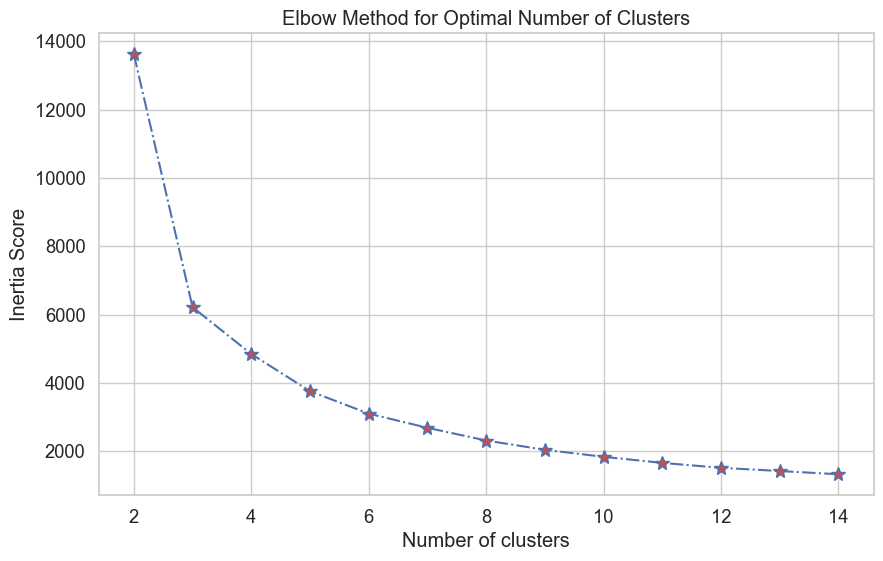

In [87]:
# Elbow Method
plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')
plt.plot(range(2, 15), wcss, marker='*', linestyle='dashdot', markersize=10, markerfacecolor='r')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.grid(True)
plt.show()

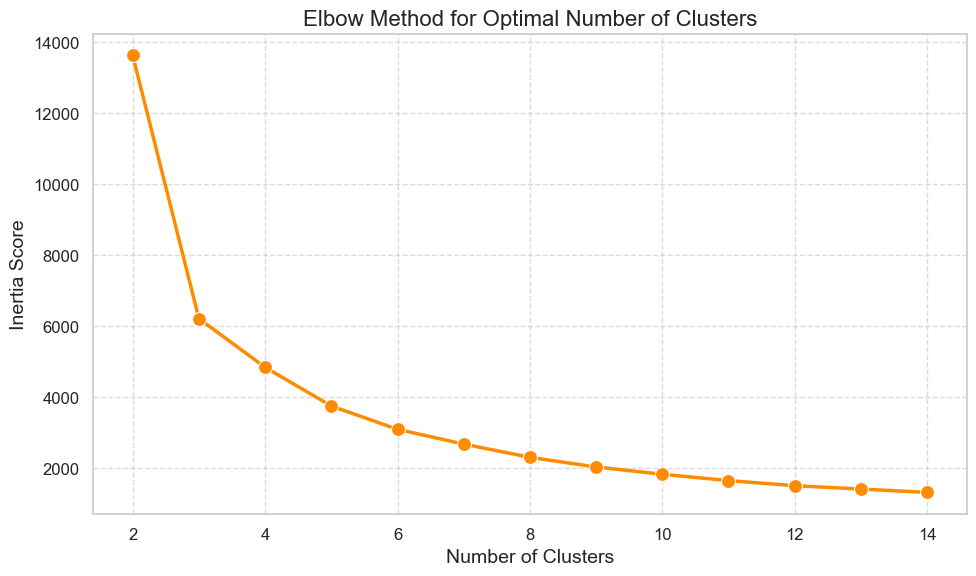

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Plotting inertia scores over cluster count
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 15), y=wcss, marker='o', markersize=10, color='darkorange', linewidth=2.5)
plt.title('Elbow Method for Optimal Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [89]:
silhouette_scores = []
silhouette_scores_dict = {}

for i in range(2, 15):
    model_kmeans = KMeans(n_clusters=i, random_state=10)
    model_kmeans.fit(scaledData)
    cluster_labels = model_kmeans.labels_
    silhouette_average = silhouette_score(scaledData, cluster_labels)
    silhouette_scores.append(silhouette_average)
    silhouette_scores_dict[i] = silhouette_average
    print(f"The silhouette score for {i} clusters is {silhouette_average:.4f}")

C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 2 clusters is 0.5914


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 3 clusters is 0.6013


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 4 clusters is 0.5980


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 5 clusters is 0.5207


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 6 clusters is 0.5081


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 7 clusters is 0.5030


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 8 clusters is 0.4963


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 9 clusters is 0.4995


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 10 clusters is 0.4778


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 11 clusters is 0.4718


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 12 clusters is 0.4650


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 13 clusters is 0.4504


C:\Users\SAYAN ROY\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhouette score for 14 clusters is 0.4468


In [90]:
silhouette_df = pd.DataFrame(list(silhouette_scores_dict.items()), columns=['Clusters', 'Silhouette Score'])

# Print the DataFrame
print(silhouette_df)

    Clusters  Silhouette Score
0          2          0.591403
1          3          0.601329
2          4          0.597976
3          5          0.520707
4          6          0.508061
5          7          0.502963
6          8          0.496344
7          9          0.499521
8         10          0.477776
9         11          0.471836
10        12          0.465021
11        13          0.450360
12        14          0.446810


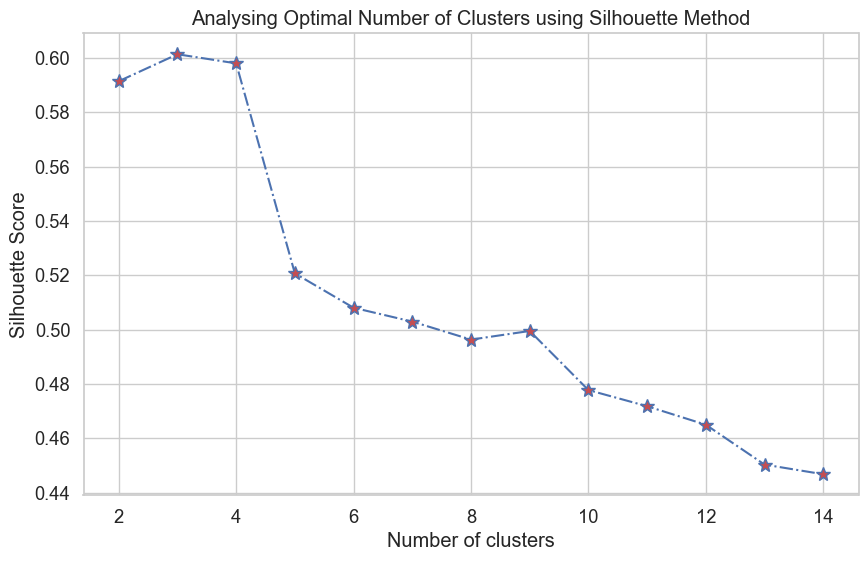

In [91]:
# Plotting silhouette scores over cluster count
plt.figure(figsize=(10, 6))
plt.plot(range(2, 15), silhouette_scores, marker='*', linestyle='dashdot', markersize=10, markerfacecolor='r')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Analysing Optimal Number of Clusters using Silhouette Method')
plt.grid(True)
plt.show()

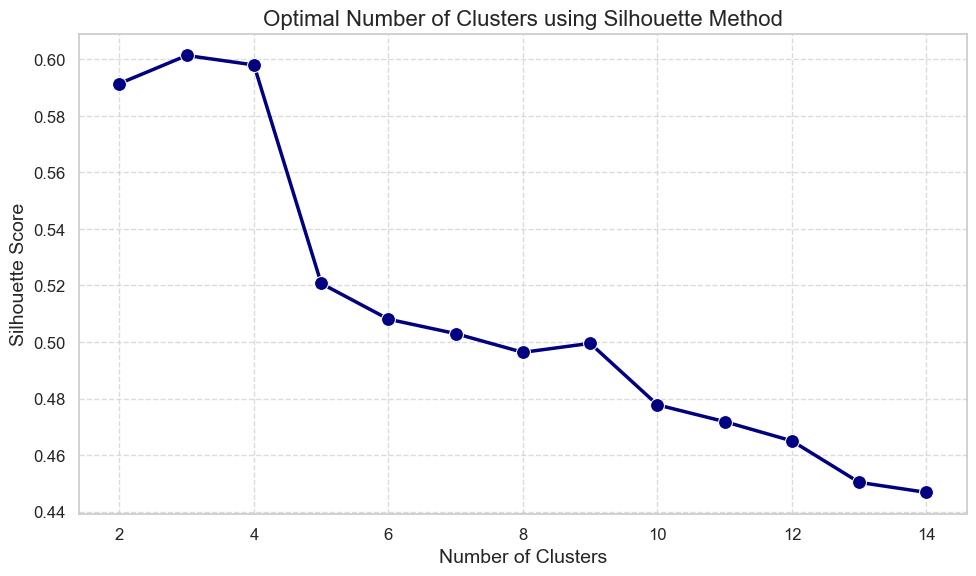

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid", font_scale=1.2)

# Plotting silhouette scores over cluster count
plt.figure(figsize=(10, 6))
sns.lineplot(x=range(2, 15), y=silhouette_scores, marker='o', markersize=10, color='navy', linewidth=2.5)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Optimal Number of Clusters using Silhouette Method', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


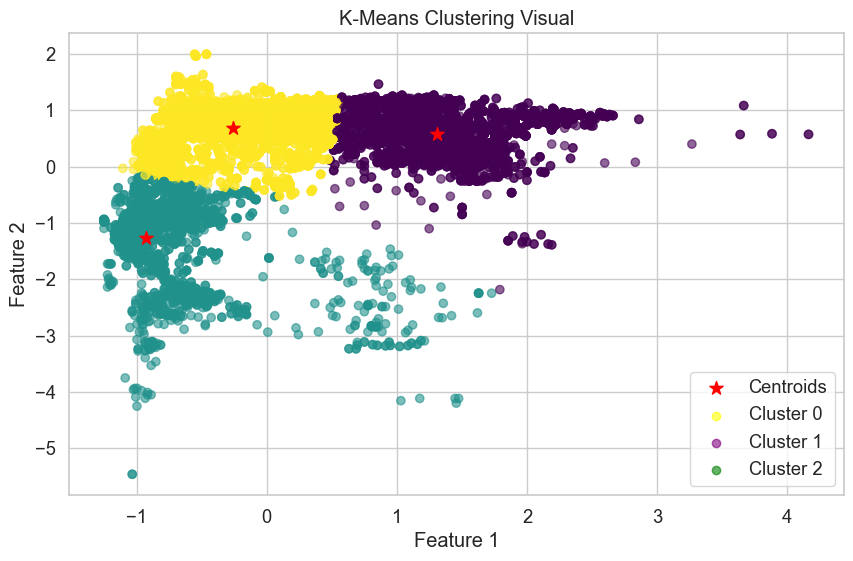

In [93]:
model_kmeans = KMeans(n_clusters=3, max_iter=300, n_init=10, random_state=10)
model_kmeans.fit(scaledData)
cluster_labels = model_kmeans.labels_
centroids = model_kmeans.cluster_centers_
    
plt.figure(figsize=(10, 6))
scatter = plt.scatter(scaledData[:, 0], scaledData[:, 1], c=cluster_labels, cmap='viridis', marker='o', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='*', label='Centroids')
plt.title('K-Means Clustering Visual')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

colors_label_dict = {0: 'yellow', 1: 'purple', 2: 'green'}

for i in sorted(set(cluster_labels)):
    plt.scatter([], [], c=colors_label_dict[i], alpha=0.6, label=f'Cluster {i}')

plt.legend()
plt.show()

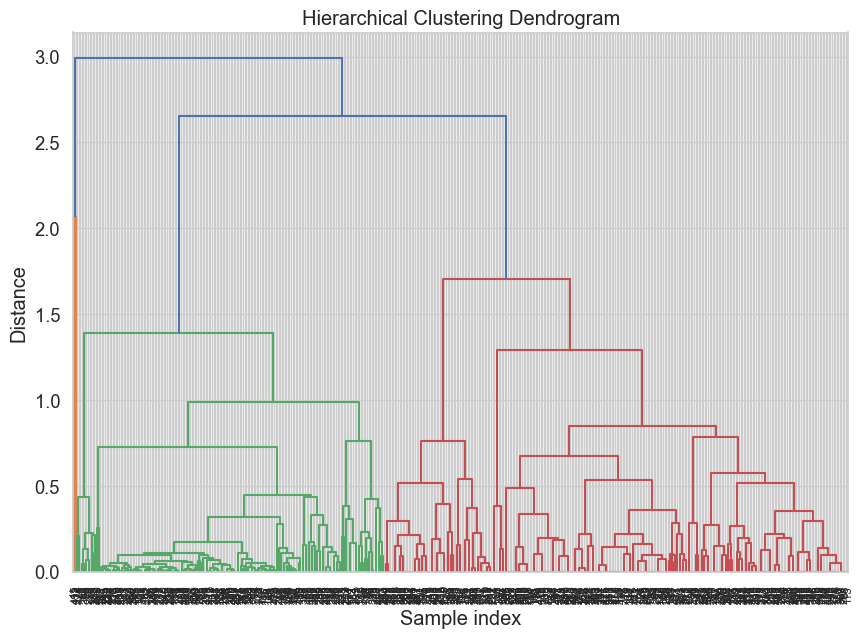

In [94]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

sample_size = 500
X_sampled = scaledData[:sample_size, :]


# Generate the linkage matrix using the 'ward' method
Z = linkage(X_sampled, 'average')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))  # Set the figure size as needed
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')

dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8., 
)

plt.show()
